In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


wine_df2 = pd.read_csv('WineQT.csv')  
X = wine_df2.drop('quality', axis=1)
y = wine_df2['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#2 bileşenli tsne

In [7]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


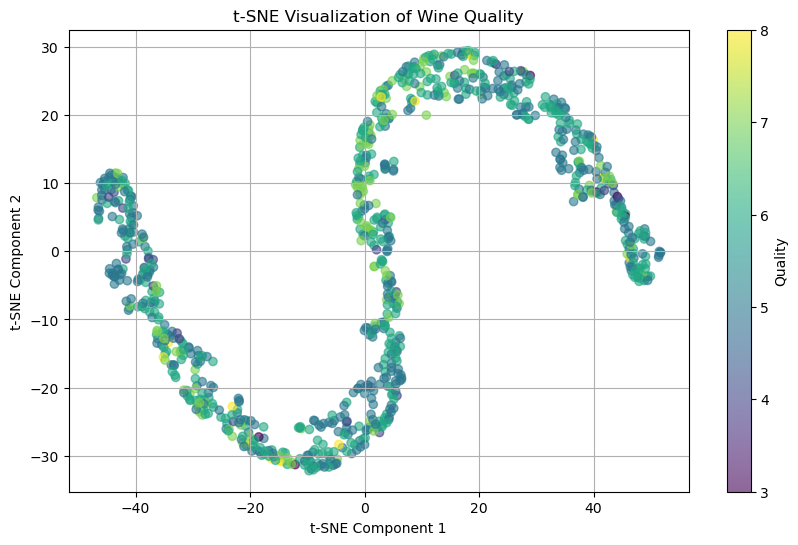

In [6]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Quality')
plt.title('t-SNE Visualization of Wine Quality')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

In [8]:
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


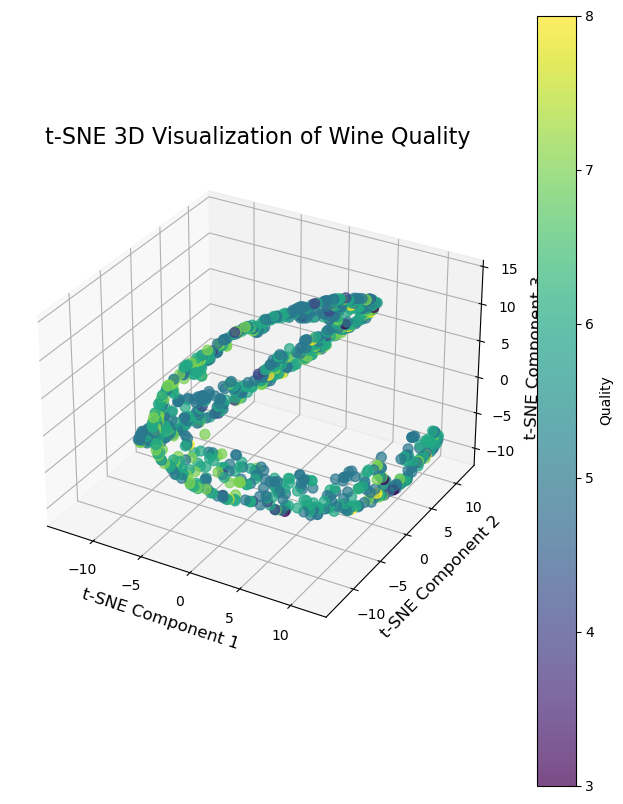

In [13]:
plt.figure(figsize=(8, 10))  # Grafik boyutunu büyütme
ax = plt.axes(projection='3d')
scatter_3d = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], 
                         c=y_train, cmap='viridis', alpha=0.7, s=50)  # s ile nokta boyutunu ayarlama
plt.colorbar(scatter_3d, label='Quality')
ax.set_title('t-SNE 3D Visualization of Wine Quality', fontsize=16)
ax.set_xlabel('t-SNE Component 1', fontsize=12)
ax.set_ylabel('t-SNE Component 2', fontsize=12)
ax.set_zlabel('t-SNE Component 3', fontsize=12)

plt.show()

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

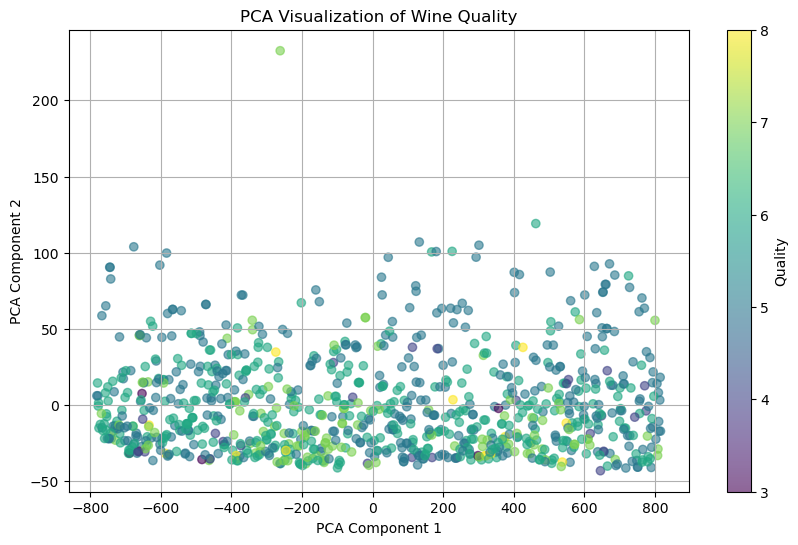

In [15]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Quality')
plt.title('PCA Visualization of Wine Quality')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()

In [16]:
model_no_pca = LinearRegression()
model_no_pca.fit(X_train, y_train)
y_pred_no_pca = model_no_pca.predict(X_test)
score_no_pca = r2_score(y_test, y_pred_no_pca)

In [17]:
pca = PCA(n_components=2) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
score_pca = r2_score(y_test, y_pred_pca)

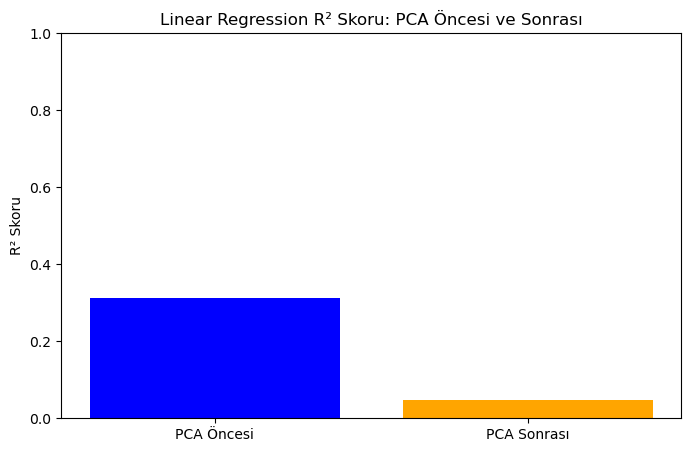

In [18]:
scores = [score_no_pca, score_pca]
labels = ['PCA Öncesi', 'PCA Sonrası']

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'orange'])
plt.ylabel('R² Skoru')
plt.title('Linear Regression R² Skoru: PCA Öncesi ve Sonrası')
plt.ylim(0, 1)
plt.show()